In [1]:
import numpy as np
import h5py
import glob, os, re, sys
import pickle
from scipy.stats import binned_statistic_2d

import sys, glob, re

sys.path.append('../')
import astro_helper as ah
from GriddedData import GriddedDataset

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.patches as patches
from matplotlib import rc
from matplotlib.ticker import LogLocator
from matplotlib.lines import Line2D
from matplotlib.colors import LogNorm
rc('axes', linewidth=1.5)
rc('axes', edgecolor='#3C3C3C')
plt.style.use('mpl_style_Jeffreson.mplstyle')

# Load the data

In [14]:
folder = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/ETGs/vlM-output/"
with open(folder+"allgas_124_ETG-vlM.pkl", "rb") as f:
    allgas_dict = pickle.load(f)
print(allgas_dict.keys())
print([val.shape for key, val in allgas_dict.items()])

dict_keys(['rotcurve', 'kappa', 'SFR_surfdens', 'H2_frac', 'HI_frac', 'gas_surfdens', 'gas_taudep', 'star_surfdens', 'gas_voldens_midplane', 'star_voldens_midplane'])
[(50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25)]


In [15]:
tau_dep = allgas_dict['gas_surfdens'] / allgas_dict['SFR_surfdens']
Sigma_SFR = allgas_dict['SFR_surfdens']
cnd = (tau_dep > 0) & ~np.isinf(tau_dep)
tau_dep = tau_dep[cnd]
Sigma_SFR = Sigma_SFR[cnd]

/tmp/ipykernel_3832799/2313005448.py:1: RuntimeWarning: divide by zero encountered in divide
  tau_dep = allgas_dict['gas_surfdens'] / allgas_dict['SFR_surfdens']
/tmp/ipykernel_3832799/2313005448.py:1: RuntimeWarning: invalid value encountered in divide
  tau_dep = allgas_dict['gas_surfdens'] / allgas_dict['SFR_surfdens']


In [16]:
folder = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/ETGs/vlM-output/"
with open(folder+"coolgas_124_ETG-vlM_T2.0e+04_avir2.0e+00.pkl", "rb") as f:
    coolgas_dict = pickle.load(f)
print(coolgas_dict.keys())
print([val.shape for key, val in coolgas_dict.items()])

dict_keys(['gas_surfdens', 'gas_voldens_midplane', 'star_voldens_midplane', 'veldisp_midplane', 'Pturb', 'Ptherm'])
[(50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25), (50, 50, 25)]


In [17]:
tau_dyn = coolgas_dict['gas_surfdens'] * coolgas_dict['veldisp_midplane'] / (coolgas_dict['Pturb'] + coolgas_dict['Ptherm'])
tau_dyn = tau_dyn[cnd]

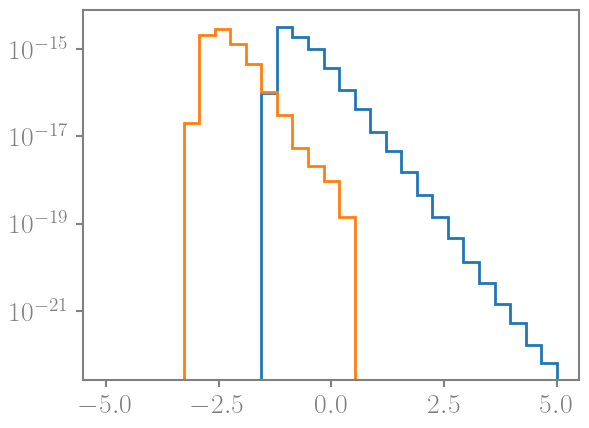

In [18]:
plt.hist(np.log10(np.ravel(tau_dep)/ah.Gyr_to_s), bins=np.linspace(-5., 5., 30),
         log=True, lw=2, histtype='step', weights=Sigma_SFR)
plt.hist(np.log10(np.ravel(tau_dyn)/ah.kB_cgs/ah.Gyr_to_s), bins=np.linspace(-5., 5., 30),
         log=True, lw=2, histtype='step', weights=Sigma_SFR)
plt.show()

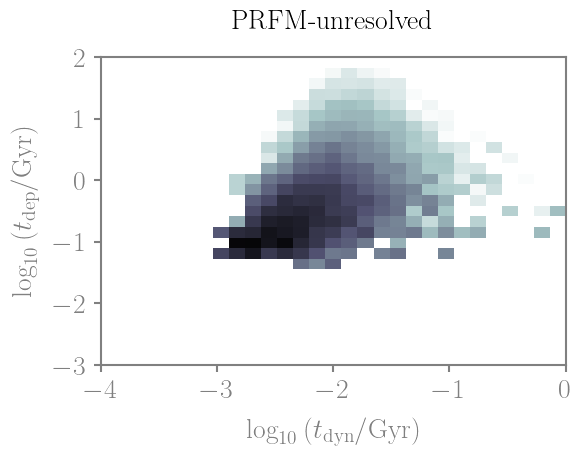

In [19]:
# 2D histogram of tau_dyn (x-axis) vs. tau_dep (y-axis) for PRFM and control (SH03) case,
# on two separate axes
fig, ax = plt.subplots(1, 1, figsize=(6,4))

# hist2D with log scale on 3rd axis
frac_SFR, _, _, _ = binned_statistic_2d(
    np.log10(tau_dyn/ah.kB_cgs/ah.Gyr_to_s), np.log10(tau_dep/ah.Gyr_to_s),
    Sigma_SFR, statistic='sum',
    bins=(np.linspace(-4., 0., 30), np.linspace(-3., 2., 30))
)
frac_SFR /= np.sum(frac_SFR)
ax.imshow(frac_SFR.T, origin='lower',
             extent=(-4., 0., -3., 2.), aspect='auto',
             cmap=plt.cm.bone_r, norm=LogNorm(vmin=1.e-5, vmax=1.e-1))
ax.set_xlabel(r'$\log_{10}{(t_{\rm dyn}/{\rm Gyr})}$')
ax.set_ylabel(r'$\log_{10}{(t_{\rm dep}/{\rm Gyr})}$')
ax.set_title('PRFM-unresolved', pad=20, fontsize=20)

plt.show()